In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import wfdb

# fixed random seed
np.random.seed(0)

from utils import computeCO
from controlProblem import solveNOC

## 1 - Load data

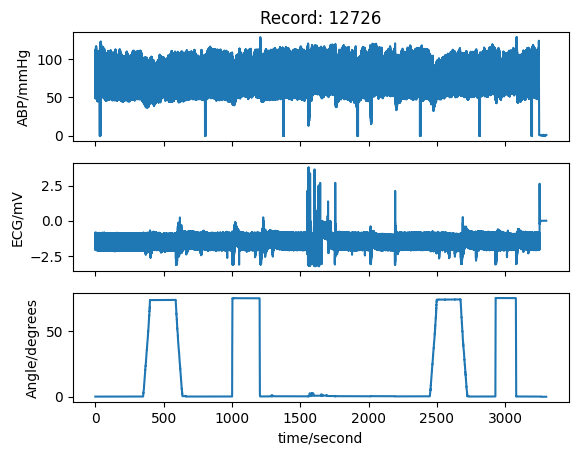

In [2]:
patientNum = 12726
dataDir = f"data/physionet.org/files/prcp/1.0.0/{patientNum}"
record = wfdb.rdrecord(dataDir)

wfdb.plot_wfdb(record)

In [3]:
fs = record.fs

bpRaw = record.p_signal[:,0]
tiltAngleRaw = record.p_signal[:,2]
time = np.arange(0, bpRaw.size) / fs

In [4]:
sex = record.comments[0].split(" ")[4]
height = float(record.comments[0].split(" ")[-4])
weight = float(record.comments[0].split(" ")[-1])
sex, height, weight

('M', 170.0, 64.0)

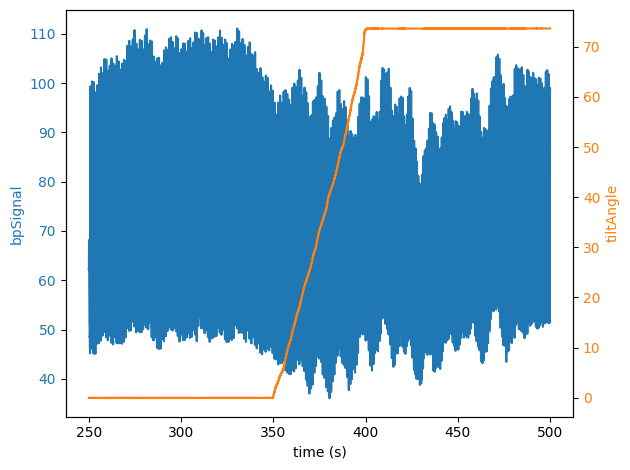

In [5]:
startTime = 250 # in seconds
endTime = 500 # in seconds

startIdx = startTime * fs
endIdx = endTime * fs

bpSignal = bpRaw[startIdx:endIdx]
tiltAngle = tiltAngleRaw[startIdx:endIdx]
timeWindow = time[startIdx:endIdx]

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('bpSignal', color=color)
ax1.plot(timeWindow, bpSignal, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('tiltAngle', color=color)  
ax2.plot(timeWindow, tiltAngle, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()


## 2 - Optimal control

In [ ]:
# downsample to time resolution of NOC problem
h = 0.1 # in seconds

# 250 Hz --> 10Hz: do decimate by 5 twice
bpDownsampleInter = sp.signal.decimate(bpSignal, 5)
bpDownsample = sp.signal.decimate(bpDownsampleInter, 5)

tiltAngleDownsampleInter = sp.signal.decimate(tiltAngle, 5)
tiltAngleDownsample = sp.signal.decimate(tiltAngleDownsampleInter, 5)

In [ ]:
# (Cau, Cal, Cvu, Cvl, Ral, Ralp, Rvl)
RCVals = (1.7, 0.26, 51, 4.3, 0.15, 7.1, 0.028)

In [ ]:
Qd = computeCO(weight, height, sex)
x, u = solveNOC(bpDownsample, RCVals, Qd, h)

TypeError: can't multiply sequence by non-int of type 'float'